In [1]:
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

In [2]:
# importing train data to learn
train = pd.read_csv("train.csv", 
                    parse_dates = True, low_memory = False, index_col = 'Date')

# additional store data
store = pd.read_csv("store.csv", 
                    low_memory = False)

In [3]:
# data extraction
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear

# adding new variable
train['SalePerCustomer'] = train['Sales']/train['Customers']

In [4]:
# Filter only Store 1 date of Type C for now
train_data = train[train.Store == 1]
#Remove opened stores with zero sales
train_data = train_data[(train_data["Open"] != 0) & (train_data['Sales'] != 0)]

In [5]:
train_data=train_data.sort_index()
train_data=train_data.fillna(0)
train_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2013-01-02,1,3,5530,668,1,0,0,1,2013,1,2,1,8.278443
2013-01-03,1,4,4327,578,1,0,0,1,2013,1,3,1,7.486159
2013-01-04,1,5,4486,619,1,0,0,1,2013,1,4,1,7.247173
2013-01-05,1,6,4997,635,1,0,0,1,2013,1,5,1,7.869291
2013-01-07,1,1,7176,785,1,1,0,1,2013,1,7,2,9.141401


In [6]:
train_data_X = train_data[['Month', 'Day', 'WeekOfYear','DayOfWeek' , 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'SalePerCustomer']]

In [7]:
train_data_y = train_data[['Sales']]

In [9]:
print("Shape of data:",train_data_X.shape,train_data_y.shape)

Shape of data: (781, 9) (781, 1)


In [24]:
#Prepare train test split
X_train = train_data_X.head(730)
X_test = train_data_X.tail(50)
y_train = train_data_y.head(730)
y_test = train_data_y.tail(50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000282835245C8>]],
      dtype=object)

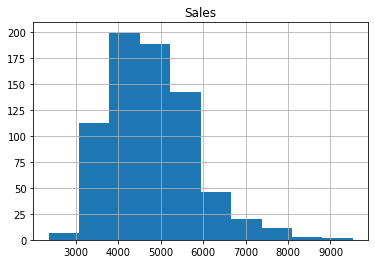

In [30]:
y_train.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028283771588>]],
      dtype=object)

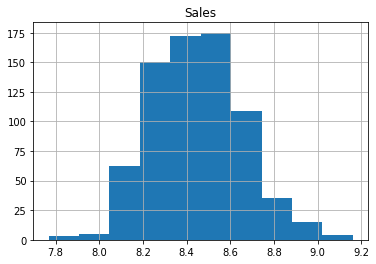

In [32]:
y1 = np.log1p(y_train)
y1.hist()

In [33]:
y_train_log = np.log1p(y_train).values

In [43]:
from sklearn.ensemble import RandomForestRegressor

clf_RF = RandomForestRegressor(n_estimators = 15,max_depth = 10,criterion = "mae")
clf_RF.fit(X_train, y_train_log)
# validation
y_pred = clf_RF.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [44]:
#RMSE,MAPE,MAE
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rmse_rf = sqrt(mean_squared_error(y_test, np.expm1(y_pred)))
MAPE= np.mean(np.abs((y_test.Sales- np.expm1(y_pred)) / y_test.Sales)) * 100
print("MAPE: ",MAPE)
print("MAE: ", mean_absolute_error(y_test.Sales, np.expm1(y_pred)))
print("RMSE: ",rmse_rf)

MAPE:  7.9973666514105135
MAE:  330.79402406432087
RMSE:  416.9746344718955


In [17]:
y_test['yhat'] = list(np.expm1(y_pred))
y_test

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sales,yhat
Date,,
2015-06-03,5809,5592.227092
2015-06-05,5384,4993.333566
2015-06-06,4183,5140.989467
2015-06-08,4071,4169.576769
2015-06-09,4102,4448.758944
2015-06-10,3591,4112.721299
2015-06-11,3627,3997.062876
2015-06-12,3695,4694.101905
2015-06-13,4256,4568.325122
